# 1: Data Collection and Importing

In [1]:
import pandas as pd
import numpy as np

In [5]:
file_path = "Final_Data_Set.xlsx"
df = pd.read_excel(file_path)

In [6]:
df.head()

,ID No.,Program of Study,Gender,Nationality,Place of Birth,Father's Education,Mother's Education,Parental Income,Number of immediate family members,Any close family member with the same profession available for guidance,...,I frequently make use of You tube or Chat GPT for understanding of different concepts.,I enjoy and perform well in non-technical (Humanities/ Management/ Social Science) courses.,I am usually well prepared for exams but unable to attempt properly due to exam stress.,Instructors often miss lectures and arrange makeup classes that further increases my burden.,My classes schedule is usually very tight that hinders the process of learning.,I often come across health issues that effect my academic performance.,My preferable mode of study is:,My preferable time of study is:,My overall mobile usage (daily) for non-academic purpose is limited to:,Identify any other variable that has negatively impacted on your academic performance.
0,1,Computer Science,Male,Pakistani,Punjab,MS,PhD/ Doctor,Between 50K~1Lac,5,YES,...,Strongly Agree,Disagree,Strongly disagree,Strongly Agree,Strongly Agree,Agree,Group study,Day time,5~6 hours,- work other than studying ( like I'm in to te...
1,2,Computer Science,Male,Pakistani,Punjab,BS,PhD/ Doctor,Between 1Lac~2Lac,5,NO,...,Neutral,Agree,Disagree,Disagree,Disagree,Disagree,Independent study,Day time,5~6 hours,1. Instructors can create engaging and useful ...
2,3,Computer Science,Male,Pakistani,Punjab,MS,PhD/ Doctor,Between 2Lac~3Lac,6,NO,...,Agree,Disagree,Strongly Agree,Agree,Agree,Agree,Independent study,Day time,1~2 hours,When any teacher call your name again and agai...
3,4,Computer Science,Male,Pakistani,Punjab,MS,Intermediate,Between 1Lac~2Lac,6,NO,...,Strongly Agree,Neutral,Neutral,Neutral,Neutral,Neutral,Independent study,Late night,1~2 hours,"Nil, I my self did was not interested in study..."
4,5,Computer Science,Male,Pakistani,KPK,BS,Intermediate,Between 50K~1Lac,5,NO,...,Strongly Agree,Agree,Agree,Agree,Disagree,Neutral,Independent study,Late night,3~4 hours,Not specific labs and equipment to perform pra...


In [7]:
#displays basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 76 columns):
 #   Column                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                           --------------  -----  
 0   ID No.                                                                                                                                           73 non-null     int64  
 1   Program of Study                                                                                                                                 73 non-null     object 
 2   Gender                                                                                                                                           73 non-null     object 
 3   Nationality           

In [8]:
df.describe()

,ID No.,Matric percentage,Intermediate percentage,SGPA in BS First semester,SGPA in BS Second semester,SGPA in BS Third semester,SGPA in BS Fourth semester,SGPA in BS Fifth semester,CGPA in BS Fifth semester
count,73.000000,73.000000,73.000000,71.000000,73.000000,73.000000,73.000000,73.000000,72.000000
mean,37.000000,83.744247,74.393014,3.005775,2.668904,2.823014,2.680274,2.825753,2.792361
std,21.217131,6.075923,5.550296,0.468245,0.576967,0.495686,0.523378,0.499614,0.424219
min,1.000000,61.430000,59.090000,1.230000,1.260000,1.690000,1.460000,1.810000,2.030000
25%,19.000000,81.620000,71.360000,2.690000,2.280000,2.490000,2.260000,2.480000,2.477500
50%,37.000000,84.360000,74.450000,3.170000,2.630000,2.810000,2.630000,2.760000,2.730000
75%,55.000000,87.730000,77.360000,3.330000,3.060000,3.200000,3.060000,3.190000,3.062500
max,73.000000,96.270000,87.450000,3.810000,3.770000,3.880000,3.890000,4.000000,3.730000


In [9]:
df.isnull().sum()

ID No.                                                                                    0
Program of Study                                                                          0
Gender                                                                                    0
Nationality                                                                               0
Place of Birth                                                                            0
                                                                                         ..
I often come across health issues that effect my academic performance.                    0
My preferable mode of study is:                                                           0
My preferable time of study is:                                                           0
My overall mobile usage (daily) for non-academic purpose is limited to:                   0
Identify any other variable that has negatively impacted on your academic perfor

# 2: Data Cleaning

## 2.1: Handle missing values

In [10]:
import pandas as pd
import numpy as np

# Define a list of columns with missing values
columns_with_missing = df.columns[df.isnull().any()]

# Impute missing values for numerical columns with mean
for col in columns_with_missing:
    if df[col].dtype == 'float64':
        df[col].fillna(df[col].mean(), inplace=True)

# Impute missing values for numerical columns with median
for col in columns_with_missing:
    if df[col].dtype == 'float64':
        df[col].fillna(df[col].median(), inplace=True)

# Impute missing values for categorical columns with mode
for col in columns_with_missing:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)


## 2.2: Remove duplicate

In [11]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)


## 2.3: Outlier detection and treatment

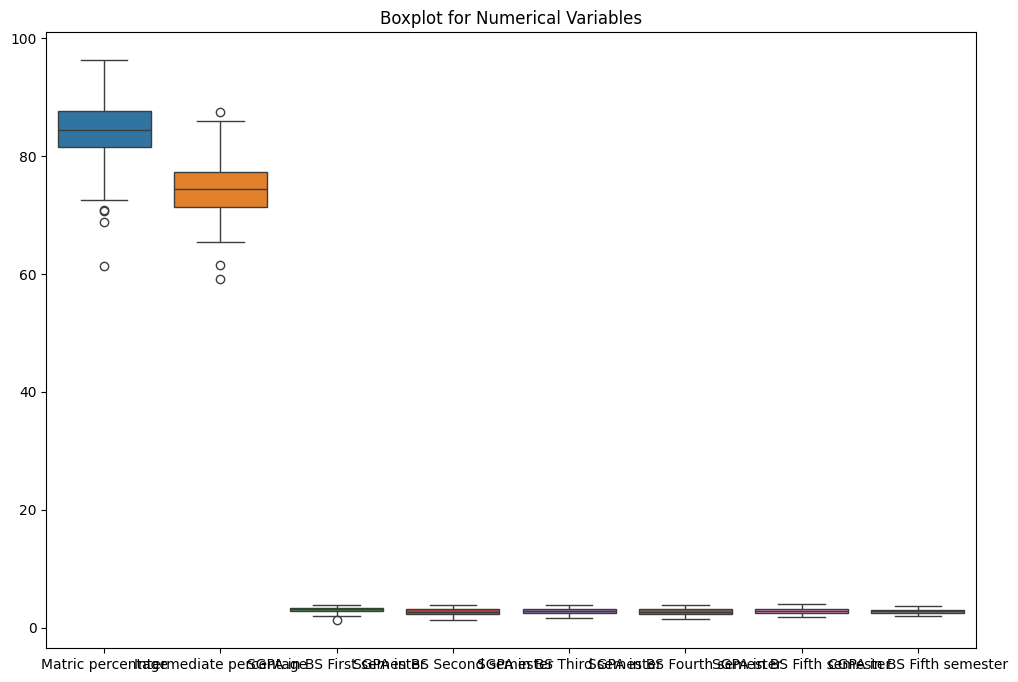

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Assuming df is your DataFrame
# Step 1: Visual Exploration
# Use box plots for numerical variables
numerical_columns = df.select_dtypes(include=['float64']).columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplot for Numerical Variables')
plt.show()

In [14]:
z_scores = zscore(df[numerical_columns])
abs_z_scores = np.abs(z_scores)
threshold = 3  # Adjust this threshold as needed
outliers = df[abs_z_scores > threshold].index


In [15]:
df_clean = df.drop(outliers)


In [16]:
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean[col] = df[col].clip(lower_bound, upper_bound)


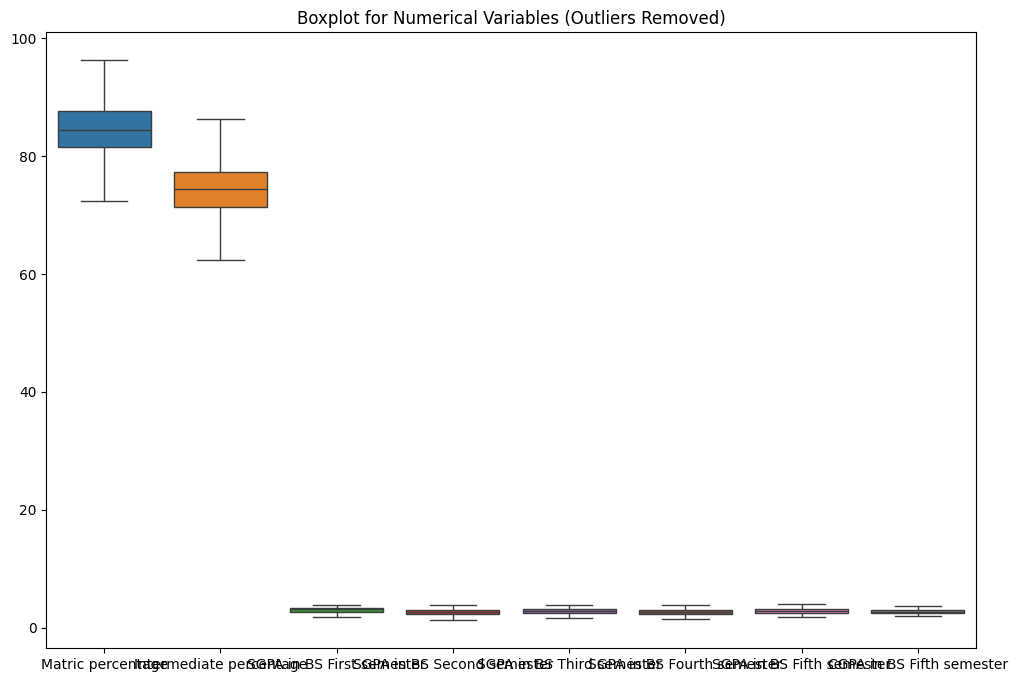

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_clean[numerical_columns])
plt.title('Boxplot for Numerical Variables (Outliers Removed)')
plt.show()


In [18]:
# Step 2: Statistical Measures
summary_statistics = df_clean.describe()


# 3: Data Visualization

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Select numerical columns for visualization
numerical_columns = df.select_dtypes(include=['float64']).columns

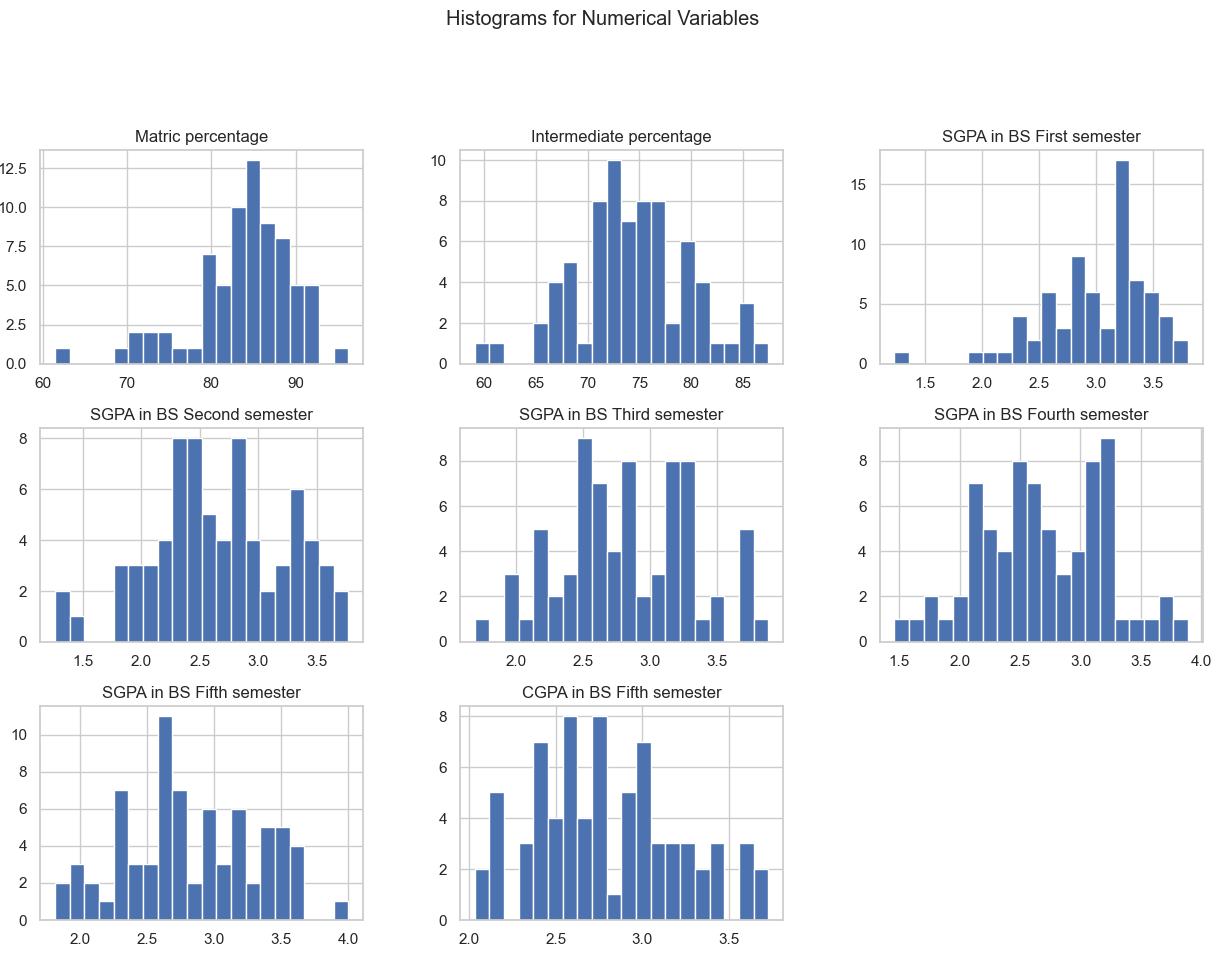

In [20]:
# Histograms for Numerical Variables
df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms for Numerical Variables', y=1.02)
plt.show()

<Figure size 1500x1000 with 0 Axes>

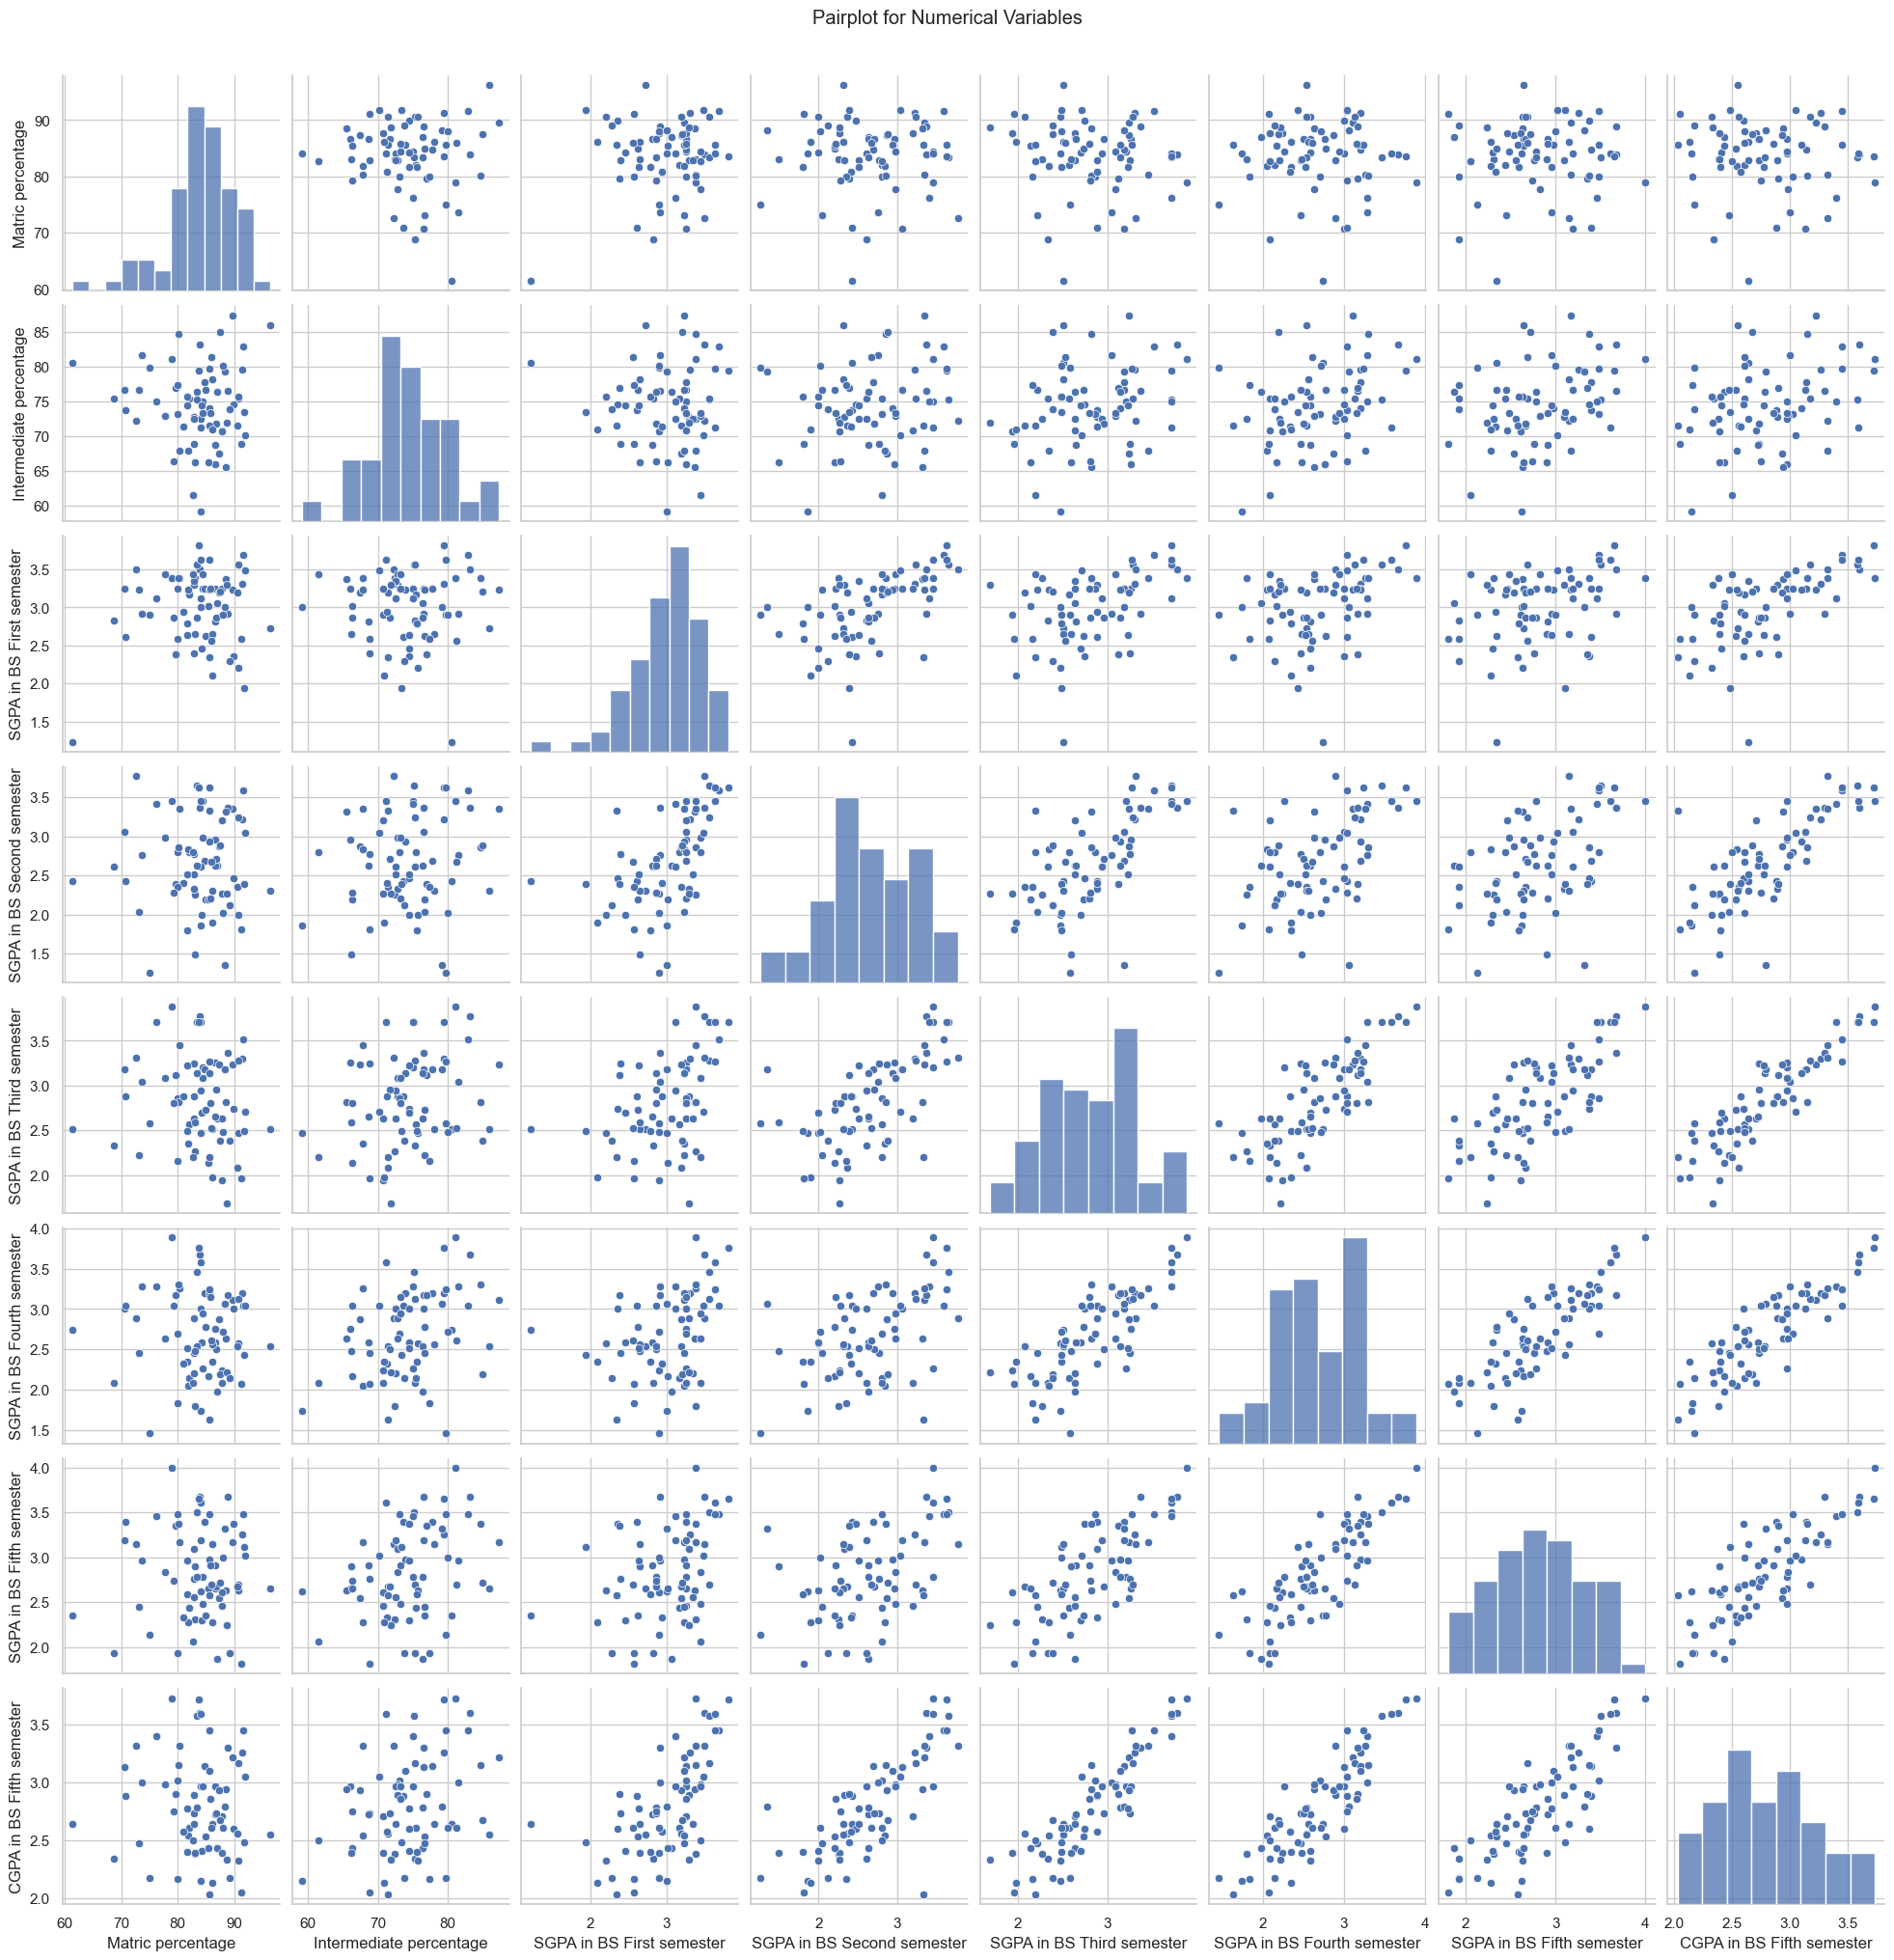

In [21]:
# Pairplot for Numerical Variables
plt.figure(figsize=(15, 10))
sns.pairplot(df[numerical_columns])
plt.suptitle('Pairplot for Numerical Variables', y=1.02)
plt.show()

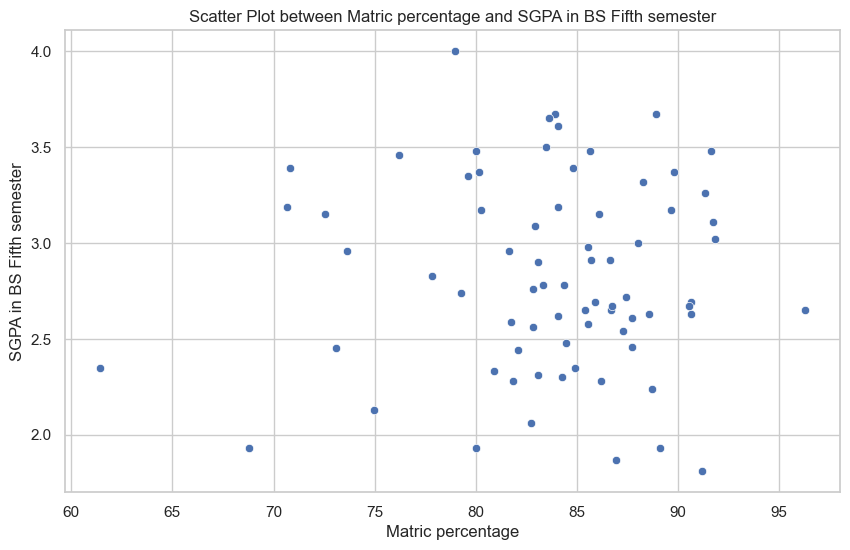

In [22]:
# Scatter Plots for Selected Variables
selected_scatter_variables = ['Matric percentage', 'SGPA in BS Fifth semester']
plt.figure(figsize=(10, 6))
sns.scatterplot(x=selected_scatter_variables[0], y=selected_scatter_variables[1], data=df)
plt.title(f'Scatter Plot between {selected_scatter_variables[0]} and {selected_scatter_variables[1]}')
plt.show()

In [33]:
import pandas as pd
import plotly.express as px

# Radar Chart for SGPA in Different Semesters
fig = px.line_polar(df, r=df[['SGPA in BS First semester', 'SGPA in BS Second semester', 'SGPA in BS Third semester','SGPA in BS Fourth semester', 'SGPA in BS Fifth semester']].mean(),
                    theta=['First Semester', 'Second Semester', 'Third Semester', 'Fourth Semester', 'Fifth Semester'],
                    line_close=True, title='Radar Chart for Average SGPA in Different Semesters')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [21]:
# Bubble Chart for Matric Percentage vs Intermediate Percentage colored by Nationality
fig = px.scatter(df, x='Matric percentage', y='Intermediate percentage', size='CGPA in BS Fifth semester',
                 hover_name='ID No.', title='Bubble Chart for Matric vs Intermediate Percentage',
                 labels={'Matric percentage': 'Matric Percentage', 'Intermediate percentage': 'Intermediate Percentage'})
fig.show()

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC\AppData\Local\Programs\Python\Python310\

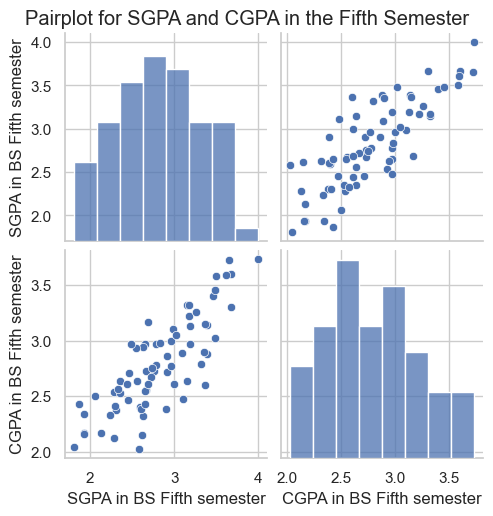

In [22]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Pairplot for SGPA and CGPA in the Fifth Semester
sns.pairplot(df, vars=['SGPA in BS Fifth semester', 'CGPA in BS Fifth semester'])
plt.suptitle('Pairplot for SGPA and CGPA in the Fifth Semester', y=1.02)
plt.show()

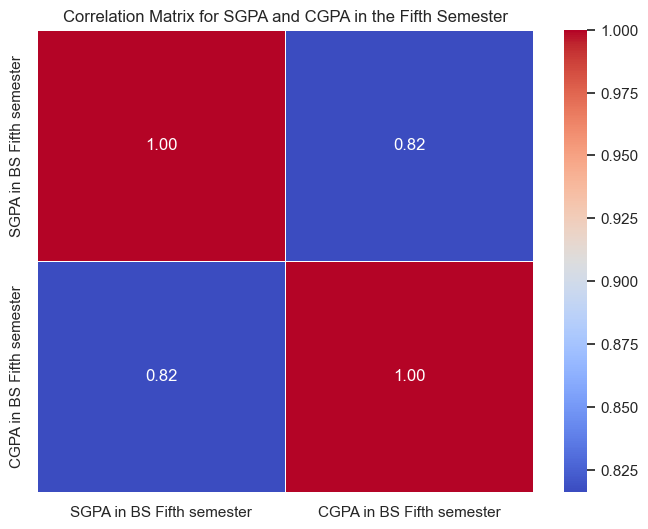

In [23]:
# Correlation Matrix for SGPA and CGPA in the Fifth Semester
correlation_matrix = df[['SGPA in BS Fifth semester', 'CGPA in BS Fifth semester']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix for SGPA and CGPA in the Fifth Semester')
plt.show()


In [24]:
# Scatter Plot for Matric Percentage vs SGPA in the Fifth Semester
fig = px.scatter(df, x='Matric percentage', y='SGPA in BS Fifth semester', trendline='ols',
                 title='Scatter Plot for Matric Percentage vs SGPA in the Fifth Semester',
                 labels={'Matric percentage': 'Matric Percentage', 'SGPA in BS Fifth semester': 'SGPA in Fifth Semester'})
fig.show()

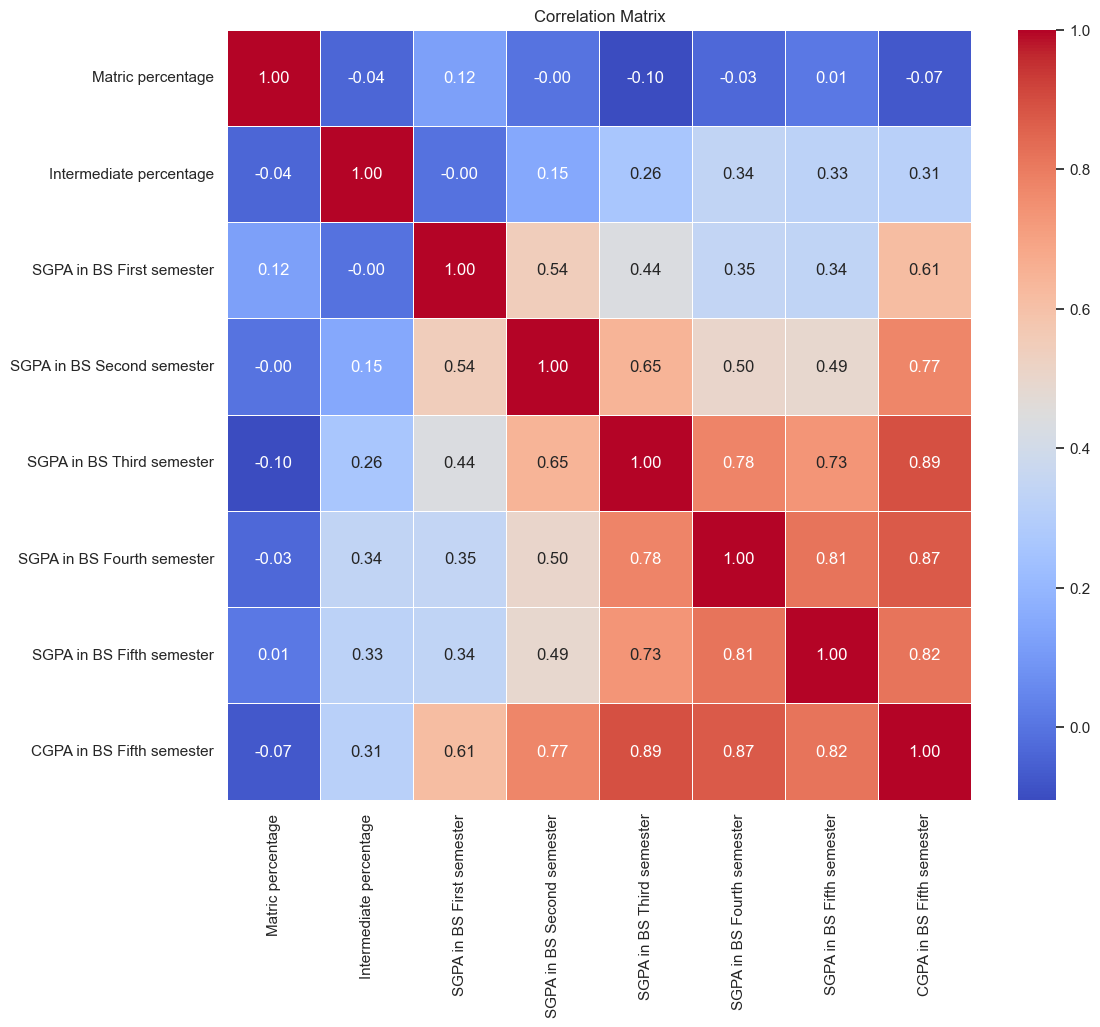

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Selecting only numeric columns for the correlation matrix
numeric_columns = df.select_dtypes(include=['float64']).columns

# Creating the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [34]:
df.to_csv('preprocessed_data.csv', index=False)

In [38]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Ensure consistent data types in categorical columns
df[categorical_columns] = df[categorical_columns].astype(str)

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Apply OneHotEncoder to the categorical columns
encoded_data = encoder.fit_transform(df[categorical_columns])

# Getting new column names for the encoded features
encoded_columns = encoder.get_feature_names_out(categorical_columns)

# Creating a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Concatenate the encoded DataFrame with the original DataFrame (excluding the original categorical columns)
final_df = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

# Display the first few rows of the final DataFrame
print(final_df.head(10))


   ID No.  Matric percentage  Intermediate percentage  \
0       1              86.95                    76.45   
1       2              84.36                    75.00   
2       3              84.09                    59.09   
3       4              68.78                    75.36   
4       5              61.43                    80.64   
5       6              82.82                    68.82   
6       7              89.64                    87.45   
7       8              86.67                    66.00   
8       9              83.91                    83.27   
9      10              91.64                    83.00   

   SGPA in BS First semester  SGPA in BS Second semester  \
0                   3.060000                        2.63   
1                   3.250000                        3.45   
2                   3.005775                        1.86   
3                   2.830000                        2.61   
4                   1.230000                        2.43   
5           

c:\Users\Muhammad Rafay\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [39]:
final_df.to_csv('preprocessed_data.csv', index=False)

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(final_df)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=final_df.columns)

# Save the scaled data to a new CSV file
scaled_df.to_csv('scaled_data.csv', index=False)


In [41]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(final_df)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=final_df.columns)

# Save the scaled data to a new CSV file
scaled_df.to_csv('scaled_data.csv', index=False)


In [42]:
data = scaled_df

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Separate the features and target variables
X = data.drop(columns=['SGPA in BS Fifth semester', 'CGPA in BS Fifth semester'])
y_sgpa = data['SGPA in BS Fifth semester']  # Target variable SGPA
y_cgpa = data['CGPA in BS Fifth semester']  # Target variable CGPA

# Split the data into training and testing sets
X_train, X_test, y_train_sgpa, y_test_sgpa = train_test_split(
    X, y_sgpa, test_size=0.2, random_state=42)
X_train, X_test, y_train_cgpa, y_test_cgpa = train_test_split(
    X, y_cgpa, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "Decision Tree": DecisionTreeRegressor()
}

# Train and evaluate each model
results = {}

for model_name, model in models.items():
    # Fit the model for SGPA
    model.fit(X_train, y_train_sgpa)
    
    # Predict SGPA
    y_pred_sgpa = model.predict(X_test)
    
    # Calculate RMSE for SGPA
    rmse_sgpa = mean_squared_error(y_test_sgpa, y_pred_sgpa, squared=False)
    
    # Fit the model for CGPA
    model.fit(X_train, y_train_cgpa)
    
    # Predict CGPA
    y_pred_cgpa = model.predict(X_test)
    
    # Calculate RMSE for CGPA
    rmse_cgpa = mean_squared_error(y_test_cgpa, y_pred_cgpa, squared=False)
    
    results[model_name] = {
        'RMSE_SGPA': rmse_sgpa,
        'RMSE_CGPA': rmse_cgpa,
    }

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"RMSE for SGPA: {metrics['RMSE_SGPA']:.2f}")
    print(f"RMSE for CGPA: {metrics['RMSE_CGPA']:.2f}")
    print()


LightGBMError: Do not support special JSON characters in feature name.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Separate the features and target variables
X = data.drop(columns=['SGPA in BS Fifth semester', 'CGPA in BS Fifth semester'])
y_sgpa = data['SGPA in BS Fifth semester']  # Target variable SGPA
y_cgpa = data['CGPA in BS Fifth semester']  # Target variable CGPA

# Split the data into training and testing sets
X_train, X_test, y_train_sgpa, y_test_sgpa = train_test_split(
    X, y_sgpa, test_size=0.2, random_state=42)
X_train, X_test, y_train_cgpa, y_test_cgpa = train_test_split(
    X, y_cgpa, test_size=0.2, random_state=42)

# Initialize the base models
base_models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('ElasticNet Regression', ElasticNet()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('XGBoost', XGBRegressor()),
    ('LightGBM', LGBMRegressor()),
    ('Decision Tree', DecisionTreeRegressor())
]

# Initialize the meta-learner (you can choose a different model if needed)
meta_learner = LinearRegression()

# Create the stacked model
stacked_model_sgpa = StackingRegressor(estimators=base_models, final_estimator=meta_learner)
stacked_model_cgpa = StackingRegressor(estimators=base_models, final_estimator=meta_learner)

# Train the stacked models
stacked_model_sgpa.fit(X_train, y_train_sgpa)
stacked_model_cgpa.fit(X_train, y_train_cgpa)

# Predict SGPA and CGPA using the stacked models
y_pred_sgpa_stacked = stacked_model_sgpa.predict(X_test)
y_pred_cgpa_stacked = stacked_model_cgpa.predict(X_test)

# Calculate RMSE for SGPA and CGPA predictions
rmse_sgpa_stacked = mean_squared_error(y_test_sgpa, y_pred_sgpa_stacked, squared=False)
rmse_cgpa_stacked = mean_squared_error(y_test_cgpa, y_pred_cgpa_stacked, squared=False)

print(f"Stacked Model (SGPA) - RMSE: {rmse_sgpa_stacked:.2f}")
print(f"Stacked Model (CGPA) - RMSE: {rmse_cgpa_stacked:.2f}")


c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 58, number of used features: 7
[LightGBM] [Info] Start training from score 0.472445
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 112
[LightGBM] [Info] Number of data points in the train set: 46, number of used features: 7
[LightGBM] [Info] Start training from score 0.482926
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 58, number of used features: 7
[LightGBM] [Info] Start training from score 0.453776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 112
[LightGBM] [Info] Number of data points in the train set: 46, number of used features: 7
[LightGBM] [Info] Start training from score 0.452813
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\

Stacked Model (SGPA) - RMSE: 0.15
Stacked Model (CGPA) - RMSE: 0.07


c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:312: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-package

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


# Separate the features and target variables
X = data.drop(columns=['SGPA in BS Fifth semester', 'CGPA in BS Fifth semester'])
y_sgpa = data['SGPA in BS Fifth semester']  # Target variable SGPA
y_cgpa = data['CGPA in BS Fifth semester']  # Target variable CGPA

# Split the data into training and testing sets
X_train, X_test, y_train_sgpa, y_test_sgpa = train_test_split(
    X, y_sgpa, test_size=0.3, random_state=42)
X_train, X_test, y_train_cgpa, y_test_cgpa = train_test_split(
    X, y_cgpa, test_size=0.3, random_state=42)

# Initialize the base models
base_models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('ElasticNet Regression', ElasticNet()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('XGBoost', XGBRegressor()),
    ('LightGBM', LGBMRegressor()),
    ('Decision Tree', DecisionTreeRegressor())
]

# Create the parallel ensemble model for SGPA
ensemble_model_sgpa = VotingRegressor(estimators=base_models, n_jobs=-1)

# Create the parallel ensemble model for CGPA
ensemble_model_cgpa = VotingRegressor(estimators=base_models, n_jobs=-1)

# Train the parallel ensemble models
ensemble_model_sgpa.fit(X_train, y_train_sgpa)
ensemble_model_cgpa.fit(X_train, y_train_cgpa)

# Predict SGPA and CGPA using the parallel ensemble models
y_pred_sgpa_ensemble = ensemble_model_sgpa.predict(X_test)
y_pred_cgpa_ensemble = ensemble_model_cgpa.predict(X_test)

# Calculate RMSE for SGPA and CGPA predictions
rmse_sgpa_ensemble = mean_squared_error(y_test_sgpa, y_pred_sgpa_ensemble, squared=False)
rmse_cgpa_ensemble = mean_squared_error(y_test_cgpa, y_pred_cgpa_ensemble, squared=False)

print(f"Parallel Ensemble Model (SGPA) - RMSE: {rmse_sgpa_ensemble:.2f}")
print(f"Parallel Ensemble Model (CGPA) - RMSE: {rmse_cgpa_ensemble:.2f}")


LightGBMError: Do not support special JSON characters in feature name.

In [ ]:
# Assuming the "ID" column is initially filled with 0's
# You can update the "ID" column values to start from 1 onwards
data['ID No.'] = range(1, len(data) + 1)

new_file_name = 'updated_dataset.csv'

# Save the updated DataFrame to the new file
data.to_csv(new_file_name, index=False)


NameError: name 'data' is not defined

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


# Filter the dataset for training and testing based on IDs
train_data = data[(data['ID No.'] >= 1) & (data['ID No.'] <= 45)]
test_data = data[(data['ID No.'] >= 46) & (data['ID No.'] <= 73)]

# Separate the features and target variables for training and testing
X_train = train_data.drop(columns=['SGPA in BS Fifth semester', 'CGPA in BS Fifth semester', 'ID No.'])
y_train_sgpa = train_data['SGPA in BS Fifth semester']  # Target variable SGPA for training
y_train_cgpa = train_data['CGPA in BS Fifth semester']  # Target variable CGPA for training

X_test = test_data.drop(columns=['SGPA in BS Fifth semester', 'CGPA in BS Fifth semester', 'ID No.'])
y_test_sgpa = test_data['SGPA in BS Fifth semester']  # Target variable SGPA for testing
y_test_cgpa = test_data['CGPA in BS Fifth semester']  # Target variable CGPA for testing
# Remove special characters, spaces, and non-alphanumeric characters from feature names
X_train.columns = X_train.columns.str.replace(' [^a-zA-Z0-9_]', '_', regex=True)
X_test.columns = X_test.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True)

# Initialize the base models and the meta-learner
base_models = [
    ('Linear_Regression', LinearRegression()),
    ('Ridge_Regression', Ridge()),
    ('Lasso_Regression', Lasso()),
    ('ElasticNet_Regression', ElasticNet()),
    ('Random_Forest', RandomForestRegressor()),
    ('Gradient_Boosting', GradientBoostingRegressor()),
    ('XGBoost', XGBRegressor()),
    ('LightGBM', LGBMRegressor()),
    ('Decision_Tree', DecisionTreeRegressor())
]

meta_learner = LinearRegression()

# Create and train the stacked models without cross-validation
stacked_model_sgpa = StackingRegressor(estimators=base_models, final_estimator=meta_learner, cv=None)
stacked_model_cgpa = StackingRegressor(estimators=base_models, final_estimator=meta_learner, cv=None)

stacked_model_sgpa.fit(X_train, y_train_sgpa)
stacked_model_cgpa.fit(X_train, y_train_cgpa)

# Predict SGPA and CGPA using the stacked models for testing data
y_pred_sgpa_stacked = stacked_model_sgpa.predict(X_test)
y_pred_cgpa_stacked = stacked_model_cgpa.predict(X_test)

# Calculate RMSE for SGPA and CGPA predictions on the testing data
rmse_sgpa_stacked = mean_squared_error(y_test_sgpa, y_pred_sgpa_stacked, squared=False)
rmse_cgpa_stacked = mean_squared_error(y_test_cgpa, y_pred_cgpa_stacked, squared=False)

print(f"Stacked Model (SGPA) - RMSE: {rmse_sgpa_stacked:.2f}")
print(f"Stacked Model (CGPA) - RMSE: {rmse_cgpa_stacked:.2f}")


c:\Users\Muhammad Rafay\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00

c:\Users\Muhammad Rafay\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00



[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 1, number of used features: 0
[LightGBM] [Info] Start training from score 0.424658
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=1.

In [ ]:
import joblib

# Save the trained stacked models to files
joblib.dump(stacked_model_sgpa, 'stacked_model_sgpa.pkl')
joblib.dump(stacked_model_cgpa, 'stacked_model_cgpa.pkl')

print("Stacked models saved successfully.")


Stacked models saved successfully.
